# Project

The goal of this project is to check if you understand the PCA and KMeans algorithms that we covered in class.

We will walk you through computing the principal components of a matrix that shows the nutrient composition of pizzas of different brands.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set_theme()

## Loading and understanding the data

### Exercise 1

In the Google Drive of the course, you will find a file called `Pizza.csv`. Load it into this notebook and

1. create a `pandas` DataFrame called `pizza`
2. Drop the `id` column.
3. Print the first 10 rows.

In [2]:
pizza = pd.read_csv("Data/pizza.csv")

In [3]:
pizza = pizza.drop('id', axis = 1)

In [4]:
pizza.head(10)

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,27.72,21.19,45.29,5.16,1.66,0.64,4.95


### Exercise 2

Print a numerical summary of each column using the `describe` method.

In [5]:
pizza.describe()

,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


### Exercise 3

Let's inspect the dataset visually.

1. Get all scatter plots by pairs, and illuminate by the brand. (Hint: `sns.pairplot`. Pass the `corner=True` keyword argument :) )
2. Get a correlation matrix for the `pizza` dataframe, and plot it using the `heatmap` function inside `sns`.

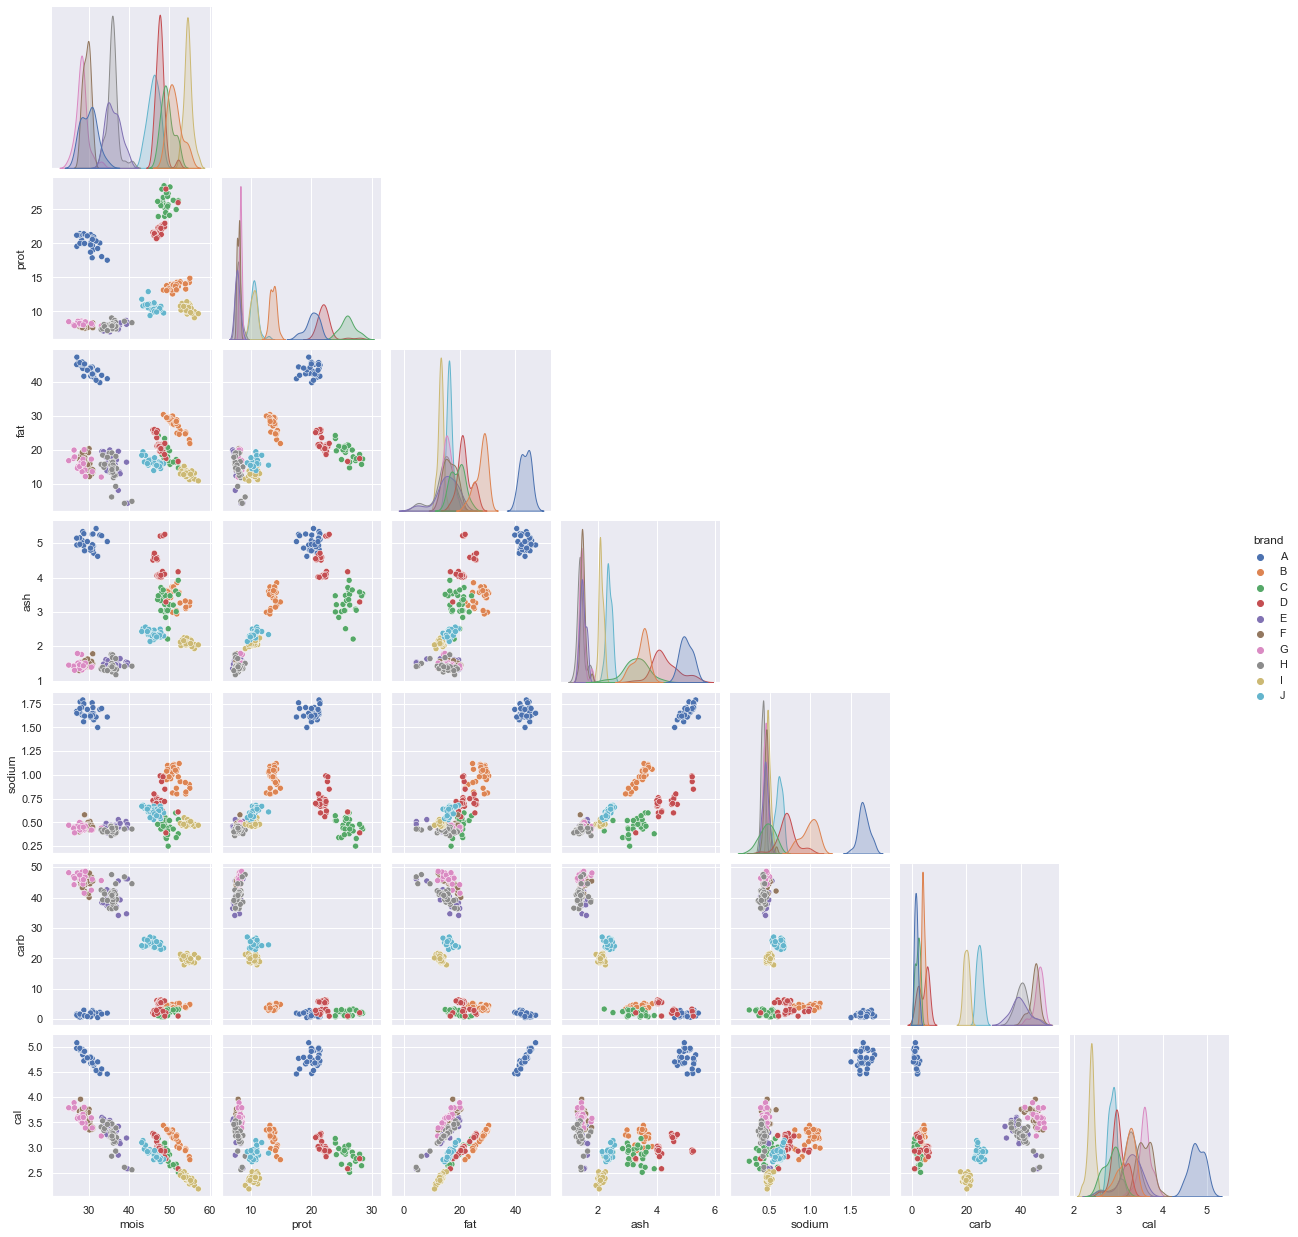

In [6]:
sns.pairplot(pizza, hue = "brand", corner = True)

<AxesSubplot:>

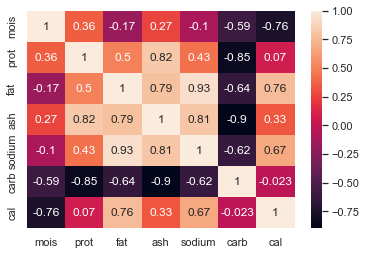

In [7]:
correlation_matrix = pizza.corr()
sns.heatmap(correlation_matrix, annot=True)

## Getting the principal components

Now let's use `sklearn` to get the principal components of this data.

### Exercise 4

From `sklearn.decomposition` import `PCA`.

In [8]:
from sklearn.decomposition import PCA

### Exercise 5

Prepare your data for PCA:

1. Define an array `X` with the contents of the `pizza` DataFrame, except for the column `brand`. Print it and compare with the original `pizza` DataFrame (Hint `.values`).
2. Scale your data using a standard scaler and print it. Import what you need.

In [9]:
y = pizza['brand'].values
X = pizza.drop("brand", axis = 1).values
print("Array X:", X) 
print("The original pizza Dataframe:", pizza)
# Result: X is an array with lists of each row of pizza including the values of each column

Array X: [[27.82 21.43 44.87 ...  1.77  0.77  4.93]
 [28.49 21.26 43.89 ...  1.79  1.02  4.84]
 [28.35 19.99 45.78 ...  1.63  0.8   4.95]
 ...
 [44.55 11.01 16.03 ...  0.64 25.98  2.92]
 [47.6  10.43 15.18 ...  0.56 24.47  2.76]
 [46.84  9.91 15.5  ...  0.57 25.48  2.81]]
The original pizza Dataframe:     brand   mois   prot    fat   ash  sodium   carb   cal
0       A  27.82  21.43  44.87  5.11    1.77   0.77  4.93
1       A  28.49  21.26  43.89  5.34    1.79   1.02  4.84
2       A  28.35  19.99  45.78  5.08    1.63   0.80  4.95
3       A  30.55  20.15  43.13  4.79    1.61   1.38  4.74
4       A  30.49  21.28  41.65  4.82    1.64   1.76  4.67
..    ...    ...    ...    ...   ...     ...    ...   ...
295     J  44.91  11.07  17.00  2.49    0.66  25.36  2.91
296     J  43.15  11.79  18.46  2.43    0.67  24.17  3.10
297     J  44.55  11.01  16.03  2.43    0.64  25.98  2.92
298     J  47.60  10.43  15.18  2.32    0.56  24.47  2.76
299     J  46.84   9.91  15.50  2.27    0.57  25.48  2.81



In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Data:", X_scaled)

Scaled Data: [[-1.37181459  1.25418127  2.74984143 ...  2.97668662 -1.22751105
   2.68012924]
 [-1.30156227  1.22771661  2.64047481 ...  3.03077869 -1.21362189
   2.53473344]
 [-1.31624186  1.03000998  2.85139615 ...  2.59804213 -1.22584435
   2.71243942]
 ...
 [ 0.3823963  -0.36794707 -0.46866201 ... -0.07951534  0.1730719
  -0.56704362]
 [ 0.70220164 -0.45823828 -0.56352082 ... -0.29588362  0.08918137
  -0.82552504]
 [ 0.62251244 -0.53918903 -0.52780927 ... -0.26883759  0.14529358
  -0.7447496 ]]


### Exercise 6

Create a PCA instance, call it `pca`. Fit it with the data X.

In [11]:
pca = PCA()
pca.fit(X_scaled)

PCA()

### Exercise 7

What are the explained variances of the principal components? What are the explained variance ratios? Print both of them.

In [13]:
expl_vari = pca.explained_variance_
print("Explained Variance of the PCs:", expl_vari)
expl_vari_rat = pca.explained_variance_ratio_
print("Explained Variance Ratios of the PCs:", expl_vari_rat)

Explained Variance of the PCs: [4.18573434e+00 2.29811778e+00 4.15948838e-01 9.54925358e-02
 2.77695834e-02 3.38738483e-04 9.55061572e-06]
Explained Variance Ratios of the PCs: [5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]


Expected answer:
```
[4.18573434e+00 2.29811778e+00 4.15948838e-01 9.54925358e-02
 2.77695834e-02 3.38738483e-04 9.55061572e-06]
[5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]
```

### Exercise 8

Get two line plots using seaborn. Give them appropiate titles and make them pretty. :)
1. One with the explained variance per principal component
2. One with the **cumulative** explained ratios.

In [14]:
type(expl_vari_rat)

numpy.ndarray

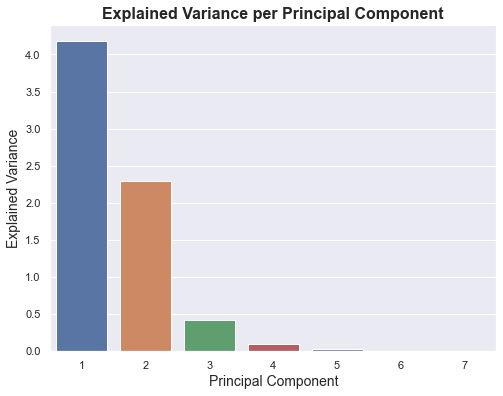

In [20]:
# create a plot for explained variance per principal component
df = pd.DataFrame({'Principal Component': range(1, len(expl_vari) + 1),
                   'Explained Variance': expl_vari})

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Principal Component', y='Explained Variance')

# Give titles & axis descriptions
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Explained Variance per Principal Component', fontsize=16, fontweight='bold')

# Show plot
plt.show()

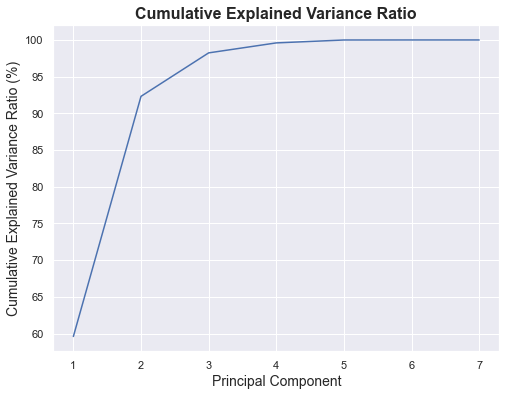

In [22]:
# calculate cumulative explained variance ratio
cumulative_expl_var_rat = np.cumsum(expl_vari_rat)

# create a plot for cumulative explained variance per principal component
plt.figure(figsize=(8, 6))
sns.lineplot(x = range(1, len(cumulative_expl_var_rat) + 1), y=(cumulative_expl_var_rat)*100)

# Give titles & axis descriptions
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('Cumulative Explained Variance Ratio (%)', fontsize = 14)
plt.title("Cumulative Explained Variance Ratio", fontsize = 16, fontweight='bold')

# Show plot
plt.show()

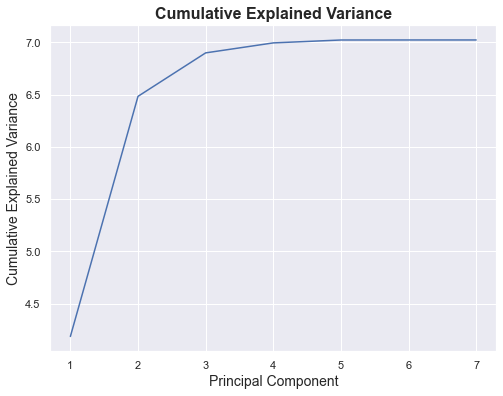

In [25]:
# calculate cumulative explained variance
cumulative_expl_var = np.cumsum(expl_vari)

# create a plot for cumulative explained variance per principal component
plt.figure(figsize=(8, 6))
sns.lineplot(x = range(1, len(cumulative_expl_var) + 1), y=(cumulative_expl_var))

# Give titles & axis descriptions
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('Cumulative Explained Variance', fontsize = 14)
plt.title("Cumulative Explained Variance", fontsize = 16, fontweight='bold')

# Show plot
plt.show()

### Exercise 9

If we want more than 90% explaned variance, how many principal components do we need? What about 95%?

**Answer: For at least 90% we need 2 PCs. For at least 95% we need 3.**

### Exercise 10

We will wrap up our PCA by showing the projection of all the data to the two principal components.

1. Create a new PCA object with `n_components=2`, call it `pca_2`, and fit it with `X`. Use the `transform` method to project the data to the plane. Call the output of `transform` an array `z`
2. Use `sns.scatterplot` with the first column of `z` as `x`, the second column of `z` as `y`, and `pizza["brand"]` as the `hue`.

In [26]:
# Create a new PCA object with n_components=2
pca_2 = PCA(n_components=2)

# Fit the PCA model with X_scaled
pca_2.fit(X_scaled)

# project the data to the plane
z = pca_2.transform(X_scaled)

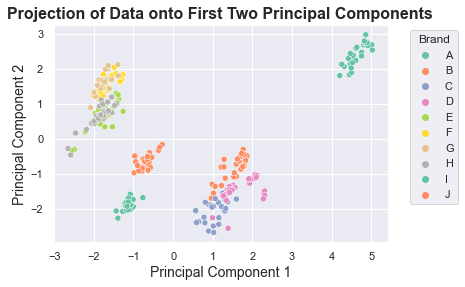

In [27]:
colors = sns.color_palette("Set2", len(pizza["brand"].unique()))
# create scatterplot
sns.scatterplot(x = z[:, 0], y = z[:, 1], hue = pizza["brand"], palette = colors)

# Visualizing the plot
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('Projection of Data onto First Two Principal Components', fontsize=16, fontweight='bold')

# Place the legend next to the graph
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

## Comparing with KMeans

### Exercise 11

Let's assume we didn't know the brands, could we recover them using K-means clustering?

1. create a `KMeans` instance with `len(pizza["brand"].unique())` clusters, call it `kmeans`.
2. Fit it on the `z` that we just plotted in the last exercise.
3. Plot a `sns.scatterplot` with `hue` given by the cluster ids. Compare it with the plot from the previous exercise (Hint: `kmeans.labels_`)

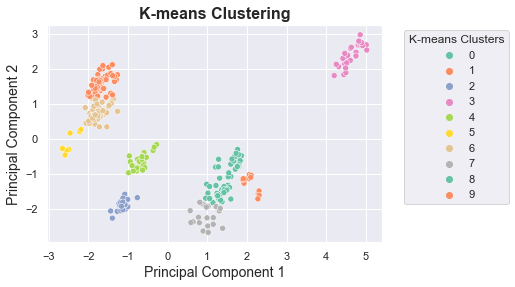

In [33]:
# create an instance
kmeans = KMeans(n_clusters=len(pizza["brand"].unique()), n_init = 10)

# fit z
kmeans.fit(z)

# plot it
# create scatterplot
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=kmeans.labels_, palette = colors)

# Visualizing the plot
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('K-means Clustering', fontsize=16, fontweight='bold')

# Place the legend next to the graph
plt.legend(title='K-means Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

Comparison with the plot from the previous exercise:
* **Overall, it appears that the clusters found by kmeans are very similar to the actual "brands" provided.**
* **However, there are some differences:**
* Some points are attributed to different clusters than the brand they belong to. This is particularly the case when they are outliers: e.g. brand D has 2 datapoints that differ from most of the datapoints belonging to D and are closer to the datapoints of brand C. As result, kmeans as attributed those points to the cluster 7 instead of 1. Similar, to k-means clusters 1, 6 and 5 a there are many overlaps in the clusters, k-means seperates them by distance ignoring the overlap. This is caused by the general functioning of k-means of attributing clusers by theire distance to the centroid.
* K-means only gives random cluster names, they are arbitrary and have to be names by humans if needed.